In [1]:
import numpy as np
import h5py, os
import matplotlib.pyplot as plt

from msfm.utils import cross_statistics

# raw and binned power spectra

In [2]:
# bin_indices, bin_names = cross_statistics.get_cross_bin_indices(with_lensing=True, with_clustering=False, with_cross_z=False, with_cross_probe=False)
bin_indices, bin_names = cross_statistics.get_cross_bin_indices(with_lensing=True, with_clustering=False, with_cross_z=True, with_cross_probe=False)

# bin_indices, bin_names = cross_statistics.get_cross_bin_indices(with_lensing=False, with_clustering=True, with_cross_z=False, with_cross_probe=False)
# bin_indices, bin_names = cross_statistics.get_cross_bin_indices(with_lensing=False, with_clustering=True, with_cross_z=True, with_cross_probe=False)

# bin_indices, bin_names = cross_statistics.get_cross_bin_indices(with_lensing=True, with_clustering=True, with_cross_z=True, with_cross_probe=True)

# grid

<KeysViewHDF5 ['cls', 'cosmo', 'i_example', 'i_noise', 'i_sobol']>
<KeysViewHDF5 ['bin_edges', 'binned', 'unbinned']>
(1, 48, 1536, 36)
(1, 48, 32, 36)
(1, 48, 15050)
(1, 48, 320)
[  30.           42.6462339    57.51085594   74.59386611   93.89526442
  115.41505086  139.15322544  165.10978815  193.284739    223.67807799
  256.28980511  291.11992036  328.16842375  367.43531528  408.92059494
  452.62426274  498.54631867  546.68676274  597.04559494  649.62281528
  704.41842375  761.43242036  820.66480511  882.11557799  945.784739
 1011.67228815 1079.77822544 1150.10255086 1222.64526442 1297.40636611
 1374.38585594 1453.5837339  1535.        ]


[Text(0.5, 0, 'summary dimension'), Text(0, 0.5, '$C_\\ell$'), None]

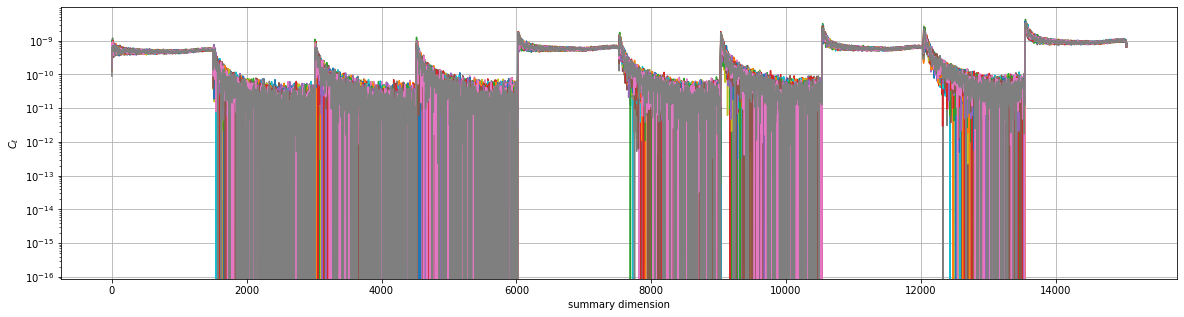

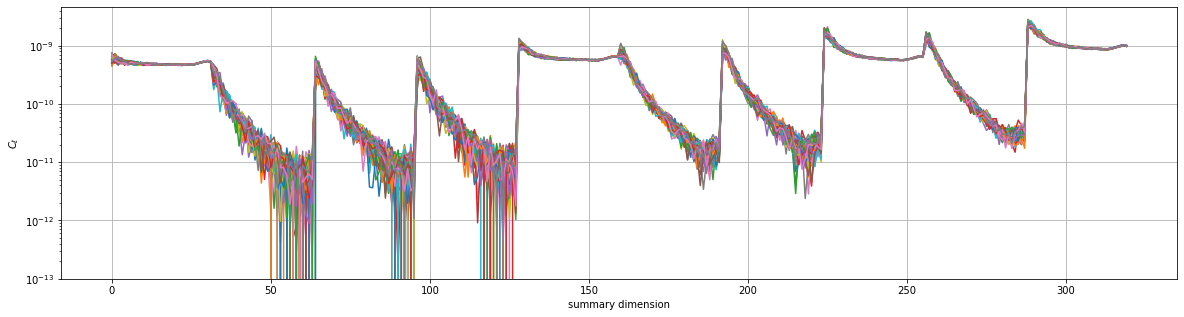

In [3]:
with h5py.File("/cluster/work/refregier/athomsen/CosmoGrid/DESY3/v6/debug/nonbinned/grid_cls.h5", "r") as f:
    print(f.keys())
    print(f["cls"].keys())
    
    cls = f["cls"]["unbinned"][:]
    binned_cls = f["cls"]["binned"][:]
    bin_edges = f["cls"]["bin_edges"][:]
    
print(cls.shape)
print(binned_cls.shape)

# select the right auto and cross bins
cls = cls[...,bin_indices]
binned_cls = binned_cls[...,bin_indices]

# select the ell range for the non-binned cls
cls = cls[:,:,30:1535,:]

# concatenate the bins along the last axis
cls = np.concatenate([cls[...,i] for i in range(cls.shape[-1])], axis=-1)
binned_cls = np.concatenate([binned_cls[...,i] for i in range(binned_cls.shape[-1])], axis=-1)

print(cls.shape)
print(binned_cls.shape)

print(bin_edges[0,:,0])

i_example = 40

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(np.squeeze(cls).T)
ax.grid(True)
# ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log", ylim=(1e-10,1e-8))
ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log")

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(np.squeeze(binned_cls).T)
ax.grid(True)
# ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log", ylim=(1e-10,1e-8))
ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log")

# ficudial

<KeysViewHDF5 ['cls', 'i_example', 'i_noise']>
<KeysViewHDF5 ['bin_edges', 'binned', 'raw']>
(12, 1536, 36)
(12, 32, 36)
(12, 15050)
(12, 320)
[  30.           42.6462339    57.51085594   74.59386611   93.89526442
  115.41505086  139.15322544  165.10978815  193.284739    223.67807799
  256.28980511  291.11992036  328.16842375  367.43531528  408.92059494
  452.62426274  498.54631867  546.68676274  597.04559494  649.62281528
  704.41842375  761.43242036  820.66480511  882.11557799  945.784739
 1011.67228815 1079.77822544 1150.10255086 1222.64526442 1297.40636611
 1374.38585594 1453.5837339  1535.        ]


[Text(0.5, 0, 'summary dimension'),
 Text(0, 0.5, '$C_\\ell$'),
 None,
 (1e-12, 1e-08)]

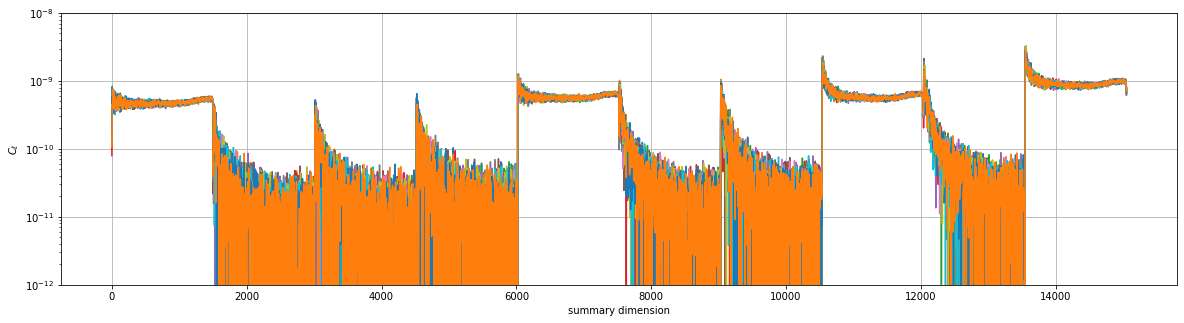

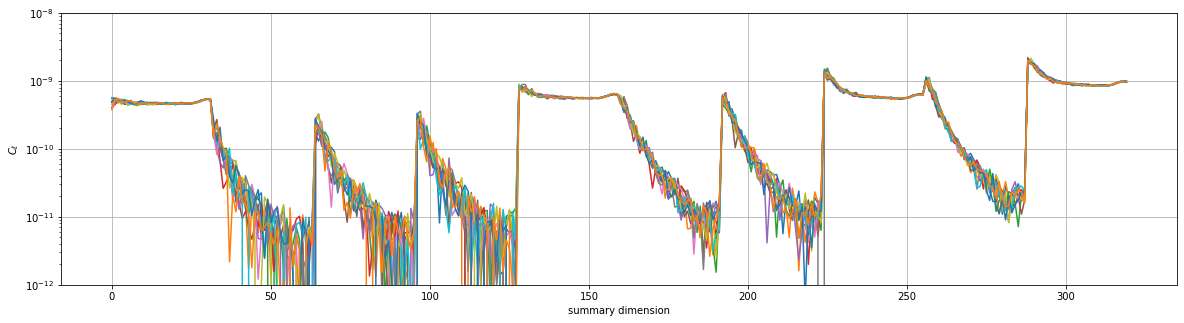

In [7]:
with h5py.File("/cluster/work/refregier/athomsen/CosmoGrid/DESY3/v6/debug/nonbinned/fiducial_cls.h5", "r") as f:
    print(f.keys())
    print(f["cls"].keys())
    
    cls = f["cls"]["raw"][:]
    binned_cls = f["cls"]["binned"][:]
    bin_edges = f["cls"]["bin_edges"][:]
    
print(cls.shape)
print(binned_cls.shape)

# select the right auto and cross bins
cls = cls[...,bin_indices]
binned_cls = binned_cls[...,bin_indices]

# select the ell range for the non-binned cls
cls = cls[:,30:1535,:]

# concatenate the bins along the last axis
cls = np.concatenate([cls[...,i] for i in range(cls.shape[-1])], axis=-1)
binned_cls = np.concatenate([binned_cls[...,i] for i in range(binned_cls.shape[-1])], axis=-1)

print(cls.shape)
print(binned_cls.shape)

print(bin_edges[:,0])

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(cls.T)
ax.grid(True)
# ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log", ylim=(1e-10,1e-8))
ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log", ylim=(1e-12,1e-8))
# ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log")

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(binned_cls.T)
ax.grid(True)
# ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log", ylim=(1e-10,1e-8))
ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log", ylim=(1e-12,1e-8))
# ax.set(xlabel="summary dimension", ylabel=r"$C_\ell$", yscale="log")